In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import datetime
import time

In [2]:
nutri = pd.read_csv("nutritionMFP.csv")
acti = pd.read_csv('exerciseMFP.csv')
measures = pd.read_csv("measurementsMFP.csv")

In [3]:


dNutri = nutri.groupby('Date').aggregate(np.sum)
nf = dNutri.reset_index()
# dActi = acti.groupby('Date').aggregate(np.sum)
# af = dActi.reset_index()

diff = measures.shape[0] 
measures['daysIn'] = measures.index
ticks = pd.date_range(start = measures.loc[0,'Date'],end = measures.loc[measures.shape[0]-1,'Date'],periods = 10)
start_, end_ = measures.loc[0,'Date'] , measures.loc[measures.shape[0]-1,'Date']
measures['avg7Weight'] = measures.rolling(7,min_periods=3,center = True)['Weight'].mean(skipna=True)
measures['avg30Weight'] = measures.rolling(30,min_periods=10,center = True)['Weight'].mean(skipna = True)



print(measures.shape,nf.shape)
measures['Date'] = pd.to_datetime(measures['Date'])
nf['Date'] = pd.to_datetime(nf['Date'])

df = pd.merge(nf,measures,on='Date')
# df = pd.merge(measures, df, on='Date')
df = df[1:-1:]
# df['Date'] = pd.to_datetime(df['Date'])
# df.columns
#nf['Date' == pd.to_datetime('2017-11-05')]



(3247, 10) (3217, 19)


In [4]:
# cols = ['Date', 'Calories', 'Weight', 'avg7Weight', 'Body Fat %', 'Fat (g)', 'Carbohydrates (g)', 'Fiber', 'Sugar', 
#         'Protein (g)',
#        'Exercise Calories', 'Exercise Minutes', 'Sets', 'Reps Per Set',
#        'Pounds', 'Steps']
cols = ['Date', 'Calories', 'Weight', 'avg7Weight','avg30Weight', 'Body Fat %', 'Fat (g)', 'Carbohydrates (g)', 'Fiber', 'Sugar', 
        'Protein (g)']
df[cols]


,Date,Calories,Weight,avg7Weight,avg30Weight,Body Fat %,Fat (g),Carbohydrates (g),Fiber,Sugar,Protein (g)
1,2012-09-14,2649.0,163.5,166.100000,166.862500,NaN,102.0,262.6,44.4,69.3,172.0
2,2012-09-16,2347.5,165.0,166.250000,166.929412,NaN,77.2,222.6,29.8,46.1,154.0
3,2012-09-17,2926.3,167.0,166.500000,166.905556,NaN,115.9,282.3,49.0,81.7,227.8
4,2012-09-18,2866.4,167.0,166.071429,166.989474,NaN,96.0,307.7,44.8,71.5,209.8
5,2012-09-19,2552.7,167.0,166.357143,166.990000,NaN,101.4,249.9,41.7,74.9,194.2
...,...,...,...,...,...,...,...,...,...,...,...
3127,2021-10-12,2290.2,152.7,153.383333,154.038889,NaN,83.3,345.4,17.5,104.1,51.5
3128,2021-10-13,3110.2,153.2,153.320000,154.011765,NaN,135.5,403.4,17.8,82.6,96.7
3129,2021-10-14,2751.4,153.0,153.433333,154.031250,8.04,133.7,304.1,12.9,39.3,95.7
3130,2021-10-15,2825.1,153.0,153.333333,154.126667,4.18,142.2,302.7,23.4,81.8,97.4


In [5]:
# df["Net Cals"] = df["Calories"] - df['Exercise Calories'] -2300
# fitbitDate ="02/01/2021"
# date = datetime.datetime.strptime(fitbitDate, "%m/%d/%Y")
# df['Cal Corrections'] = df['Date'].apply(lambda x: -400 if x < date else 0)
# df['Net Cals'] = df['Net Cals'] + df['Cal Corrections'] 

In [6]:
df.head()
# filt = (df['Net Cals'] < 5000) & (df['Net Cals'] > -2000)
# df = df[filt]

df['Cals (30d)'] = df.rolling(30,min_periods=3,center = True)['Calories'].mean(skipna=True)

/var/folders/hk/8yhk12y94z7fwn097_d9fzjh0000gp/T/ipykernel_97676/542939120.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


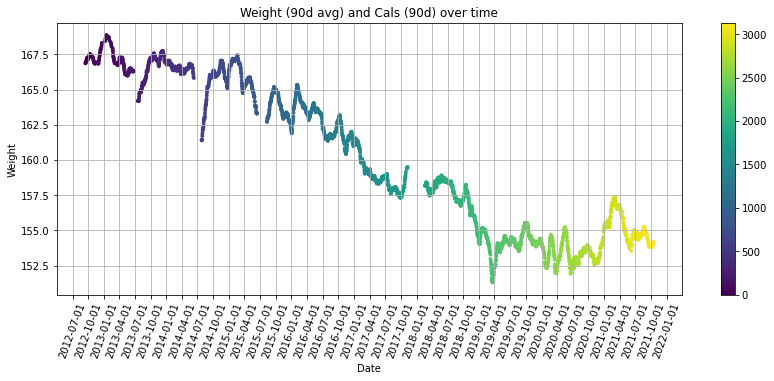

In [7]:
days_range = df.shape[0]
fig = plt.figure(figsize=(14,5))#,dpi=500) #create overall container
ax1 = fig.add_subplot(111) #add a 1 by 1 plot to the figure

xval = 'Date'
yval = 'avg30Weight'
y2val = 'Cals (30d)'
x = df[xval]  #convert data to numpy array
y = df[yval]
y2 = df[y2val]
coloring = df['daysIn']

ax1.scatter(x, y,c=coloring,cmap = 'viridis',label=coloring,s=8) #plot data points in scatter plot on ax1
#ax1.plot(x,y2,color = 'black',linewidth=1)
xmin, xmax = ax1.get_xlim()


#ax1.set_xticks(np.arange(0, np.round(xmax), 1)) 
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(matplotlib.dates.MonthLocator(interval = 3))
# ax1.text(0.0, 0.1, "StrMethodFormatter('{x}')",
#         fontsize=15, transform=ax1.transAxes)
ax1.tick_params(axis='x', rotation=70)
ax1.grid()

ax1.set_title("Weight (90d avg) and Cals (90d) over time")
ax1.set_xlabel('Date')
ax1.set_ylabel('Weight')

# ax2 = ax1.twinx()
# color = 'tab:orange'
# ax2.set_ylabel('Cals (90d)', color=color)  # we already handled the x-label with ax1
# ax2.scatter(x, y2, color=color,s=5)
# ax2.axhline(y=0, color='k')
# ax2.tick_params(axis='y', labelcolor=color)

#This took me way longer than it should have to figure out...
norm = matplotlib.colors.Normalize(vmin=0, vmax=days_range, clip=False)
fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), ax=ax1)

# fig.tight_layout()
fig.show()